#  Contexte

Les maladies cardiovasculaires (MCV) sont la première cause de décès dans le monde, faisant environ 17,9 millions de vies chaque année, ce qui représente 31 % de tous les décès dans le monde. Quatre décès sur 5 par MCV sont dus à des crises cardiaques et à des accidents vasculaires cérébraux, et un tiers de ces décès surviennent prématurément chez des personnes de moins de 70 ans. L'insuffisance cardiaque est un événement courant causé par les maladies cardiovasculaires et cet ensemble de données contient 11 caractéristiques qui peuvent être utilisées pour prédire une éventuelle maladie cardiaque. Les personnes atteintes de maladies cardiovasculaires ou à haut risque cardiovasculaire (en raison de la présence d'un ou plusieurs facteurs de risque tels que l'hypertension, le diabète, l'hyperlipidémie ou une maladie déjà établie) ont besoin d'une détection et d'une gestion précoces dans lesquelles un modèle d'apprentissage automatique peut être d'une grande aide.

# Description des métadonnées

AGE : âge du patient SEXE : sexe du patient [homme, femme] TDT : type de douleur thoracique [AT : angine typique, AA : angine atypique, DNA : douleur non angineuse, ASY : asymptomatique] PAR : pression artérielle au repos [mm Hg] CHOLESTEROL : cholestérol sérique [mm/dl] GAJ : glycémie à jeun [1 : si glycémie à jeun > 120 mg/dl, 0 : sinon] ECG au repos : résultats de l'électrocardiogramme au repos [Normal : normal, ST : présentant une anomalie de l'onde ST-T , HVG : montrant une hypertrophie ventriculaire gauche probable] FCMAX : fréquence cardiaque maximale atteinte ANGINE : angine induite par l'exercice [Oui, Non] DEPRESSION : Valeur numérique mesurée en dépression PENTE: la pente du segment ST d'exercice de pointe [Ascendant, Plat, Descendant] COEUR : maladie cardiaque[1 : Présence de la maladie, 0 : Absence de la maladie]

In [13]:
import pandas as pd
import numpy as np
import os

import matplotlib.pylab as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


from scipy.stats import chi2_contingency as chi2_contingency


In [8]:
#changer de répertoir de travail
os.chdir('C:\\Users\Admin\Desktop\Docier_pandas')

In [9]:
#lire le contenue de la data_frame
df = pd.read_excel(r"C:\Users\Admin\Desktop\Docier_pandas\mcv.xlsx") 

In [10]:
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
df.shape

(918, 12)

In [ ]:
AGE,

In [8]:
#notre df contient 12 variables (12 colones et 918 lignes)

In [9]:
df.isna().sum()

AGE            0
SEXE           0
TDT            0
PAR            0
CHOLESTEROL    0
GAJ            0
ECG            0
FCMAX          0
ANGINE         0
DEPRESSION     0
PENTE          0
CŒUR           0
dtype: int64

In [10]:
#notre df ne contient pas de variables manquantes  

# Exploration des données

Analyse univarier

In [2]:
#Segmentation des variables qualitatives et quantitatives

In [3]:
variable_quali = ["SEXE","TDT","ECG","ANGINE","PENTE","GAJ","CŒUR"]
variable_quanti = ["AGE","PAR","CHOLESTEROL","FCMAX","DEPRESSION "]

In [4]:
#la valeur à prédire ici est "CŒUR"

In [12]:
df.CŒUR.value_counts()

1    508
0    410
Name: CŒUR, dtype: int64

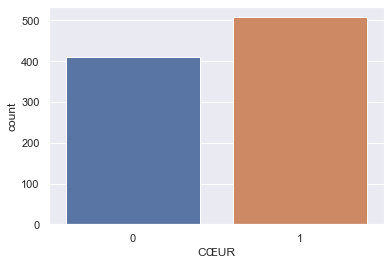

In [18]:
sns.countplot(x='CŒUR', data=df)
plt.show()

In [15]:
Absence_maladie = len(df[df.CŒUR == 0])
Présence_maladie = len(df[df.CŒUR == 1])
print("{}% des individus étudier présentent un absence de malidie".format((Absence_maladie / (len(df.CŒUR))*100)))
print("{}% des individus étudier ont une présence de maladie" .format((Présence_maladie/ (len(df.CŒUR))*100)))

44.66230936819172% des individus étudier présentent un absence de malidie
55.33769063180828% des individus étudier ont une présence de maladie


In [16]:
#Analyse de la variable "AGE"

<AxesSubplot:xlabel='AGE', ylabel='Density'>

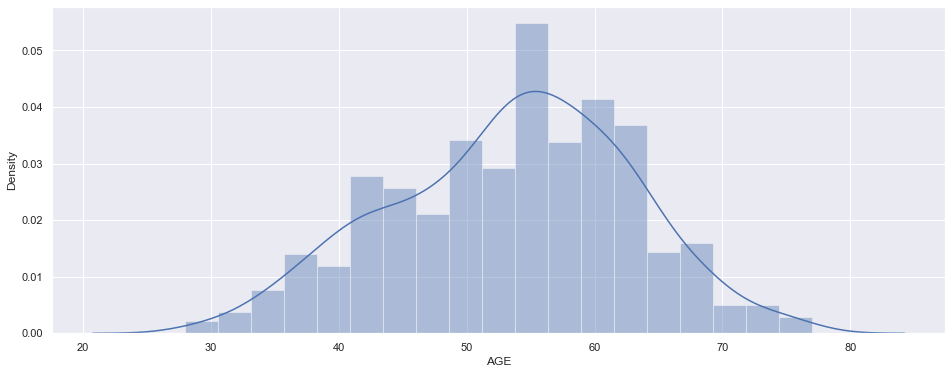

In [111]:
plt.figure(figsize=(16, 6))
sns.distplot(df["AGE"])

In [19]:
Absence_maladie = len(df[df.CŒUR == 0])
Présence_maladie = len(df[df.CŒUR == 1])
print("{}% des individus étudier présentent un absence de malidie".format((Absence_maladie / (len(df.CŒUR))*100)))
print("{}% des individus étudier ont une présence de maladie" .format((Présence_maladie/ (len(df.CŒUR))*100)))

44.66230936819172% des individus étudier présentent un absence de malidie
55.33769063180828% des individus étudier ont une présence de maladie


In [ ]:
#Analyse de la variable "SEXE"

In [20]:
#poucentage d'homme et de femme

In [21]:
_homme = (len(df[df.SEXE == "homme"])/(len(df.SEXE))*100)
_femme = (len(df[df.SEXE == "femme"])/(len(df.SEXE))*100)
print("{}% d'homme".format(_homme))
print("{}% de femme".format(_femme))

78.9760348583878% d'homme
21.0239651416122% de femme


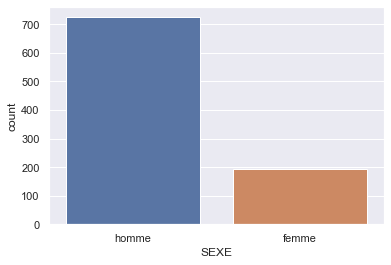

In [20]:
sns.countplot(x='SEXE', data=df)
plt.show()

In [116]:
# Analyse de la variable "TDT": type de douleur thoracique 
# AT : angine typique,
# AA : angine atypique,
# DNA : douleur non angineuse,
# ASY : asymptomatique

In [24]:
#calcul du poucentage des modalités de la variables TDT

In [38]:
print(len(df[df.TDT == "AA"])/(len(df.TDT))*100)
print(len(df[df.TDT == "DNA"])/(len(df.TDT))*100)
print(len(df[df.TDT == "ASY"])/(len(df.TDT))*100)
print(len(df[df.TDT == "AT"])/(len(df.TDT))*100)

18.845315904139433
22.113289760348582
54.03050108932462
5.010893246187364


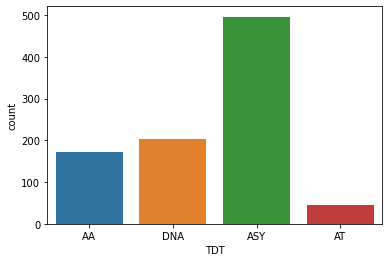

In [26]:
sns.countplot(x='TDT', data=df)
plt.show()

In [ ]:
#Analyse de la variable "PAR" (pression artérielle au repos)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PAR', ylabel='Density'>

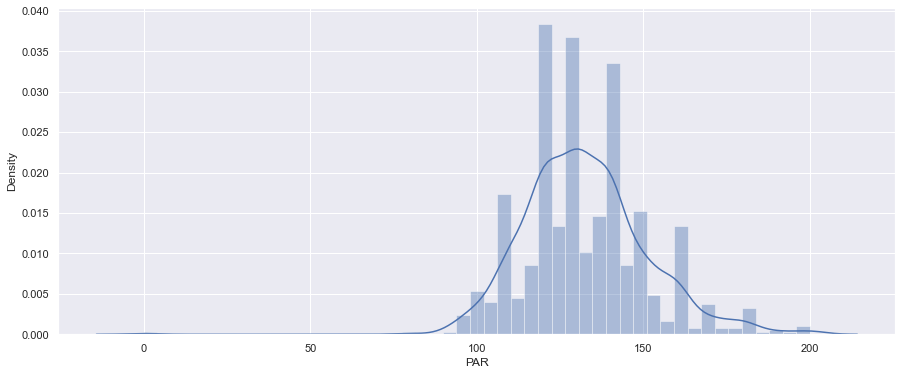

In [112]:
# sns.histplot(x="PAR", data=df)
sns.distplot(df["PAR"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CHOLESTEROL', ylabel='Density'>

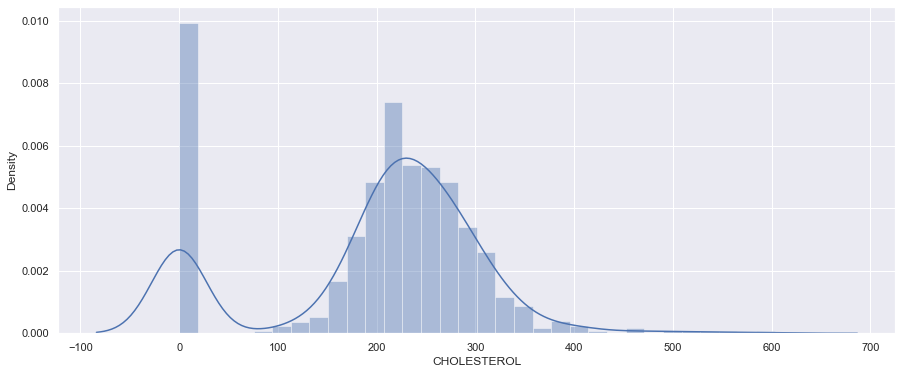

In [113]:
# sns.histplot(x='CHOLESTEROL', data=df)
# plt.show()
sns.distplot(df["CHOLESTEROL"])

In [ ]:
#Une bonne partie des individus étudier ont un 

In [ ]:
#Analyse de la variable GAJ(glycémie à jeun)

<AxesSubplot:xlabel='GAJ', ylabel='count'>

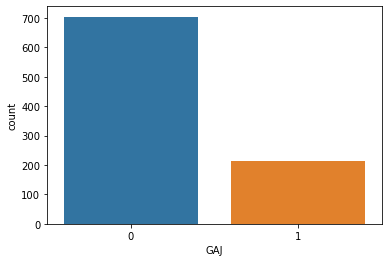

In [42]:
sns.countplot(x="GAJ", data=df)

In [46]:
GAJ_0 = (len(df[df.GAJ == 0])/(len(df.GAJ))*100)
GAJ_1 = (len(df[df.GAJ == 1])/(len(df.GAJ))*100)
print("GAJ_0 = {}%".format(GAJ_0))
print("GAJ_1 = {}%".format(GAJ_1))

GAJ_0 = 76.68845315904139%
GAJ_1 = 23.311546840958606%


In [ ]:
#Analise de la variables ECG (résultats de l'électrocardiogramme au repos)

In [50]:
Normal = (len(df[df.ECG == "Normal"])/(len(df.ECG))*100)
ST = (len(df[df.ECG == "ST"])/(len(df.ECG))*100)
LVH = (len(df[df.ECG == "LVH"])/(len(df.ECG))*100)
print("Normal = {}%".format(Normal))
print("ST = {}%".format(ST))
print("LVH = {}%".format(LVH))

Normal = 60.130718954248366%
ST = 19.389978213507625%
LVH = 20.47930283224401%


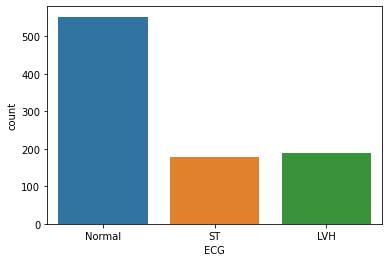

In [48]:
sns.countplot(x='ECG', data=df)
plt.show()

In [ ]:
#Analyse de la variable FCMAX (fréquence cardiaque maximale atteinte )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FCMAX', ylabel='Density'>

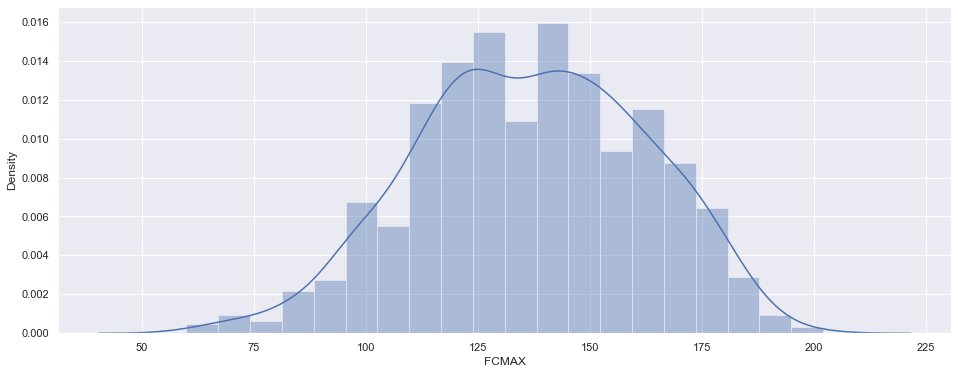

In [118]:
plt.figure(figsize=(16, 6))
sns.distplot(df["FCMAX"])

In [ ]:
#Analyse de la variable ANGINE (angine induite par l'exercice )

In [55]:
ANGINE_oui = (len(df[df.ANGINE == "Oui"])/(len(df.ANGINE))*100)
ANGINE_non = (len(df[df.ANGINE == "Non"])/(len(df.ANGINE))*100)
print("ANGINE_oui = {}%".format(ANGINE_oui))
print("ANGINE_non = {}%".format(ANGINE_non))

ANGINE_oui = 40.41394335511983%
ANGINE_non = 59.58605664488017%


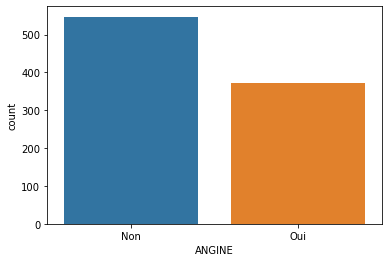

In [54]:
sns.countplot(x='ANGINE', data=df)
plt.show()

In [ ]:
#Analyse de la variable DEPRESSION : Valeur numérique mesurée en dépression

In [60]:
df.DEPRESSION=df["DEPRESSION "]

<ipython-input-60-f52b3d962b20>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.DEPRESSION=df["DEPRESSION "]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DEPRESSION ', ylabel='Density'>

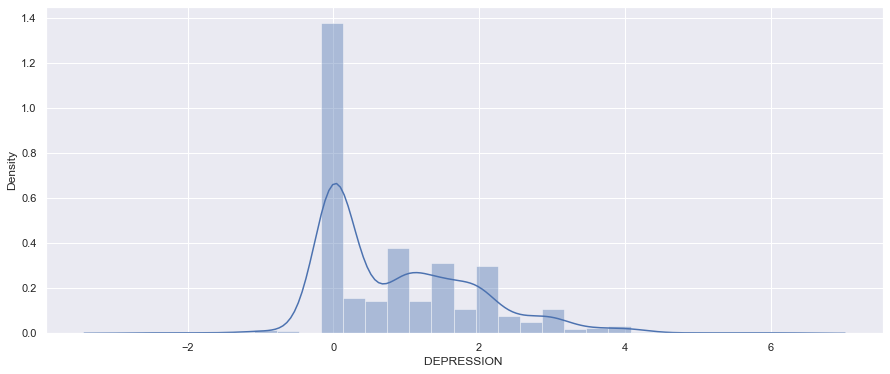

In [119]:
sns.distplot(df["DEPRESSION "])

In [ ]:
#Analyse de la variable PENTE: la pente du segment ST d'exercice de pointe

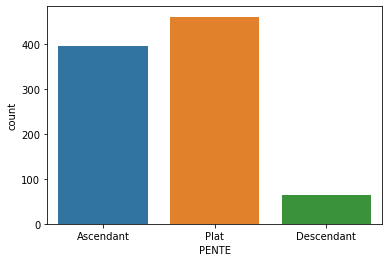

In [68]:
sns.countplot(x='PENTE', data=df)
plt.show()

In [69]:
PENTE_A = (len(df[df.PENTE == "Ascendant"])/(len(df.PENTE))*100)
PENTE_P = (len(df[df.PENTE == "Plat"])/(len(df.PENTE))*100)
PENTE_D = (len(df[df.PENTE == "Descendant"])/(len(df.PENTE))*100)
print("PENTE_A = {}%".format(PENTE_A))
print("PENTE_P = {}%".format(PENTE_P))
print("PENTE_D = {}%".format(PENTE_D))

PENTE_A = 43.028322440087145%
PENTE_P = 50.108932461873636%
PENTE_D = 6.862745098039216%


# Analyse bivariée

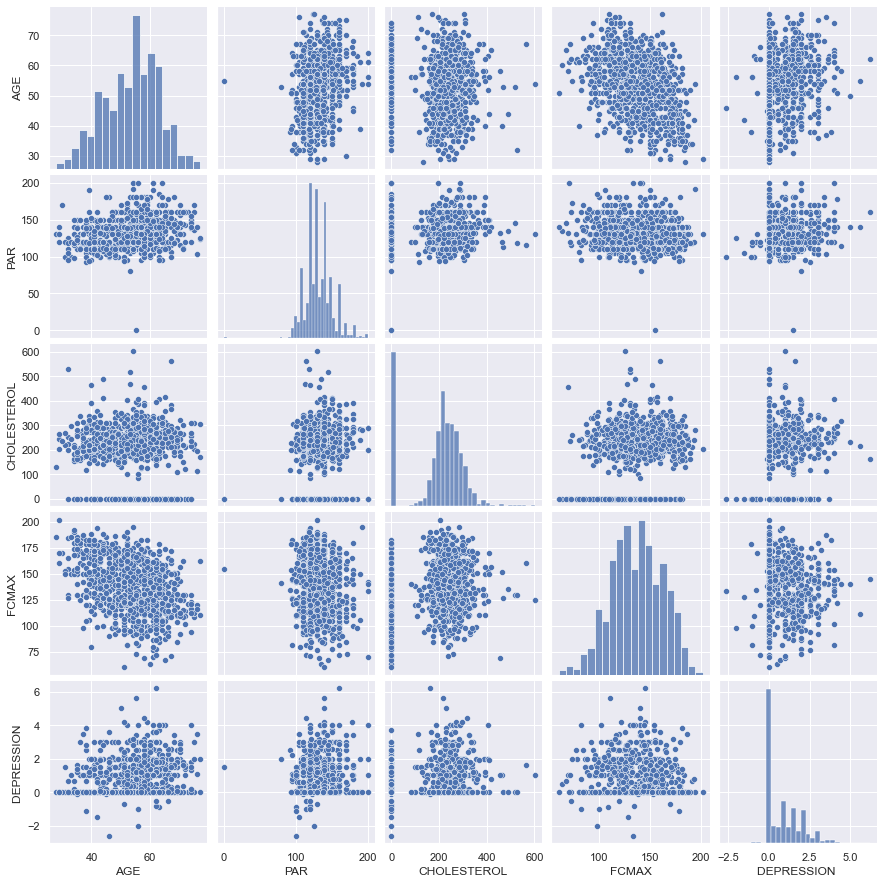

In [126]:
sns.pairplot(df[variable_quanti])

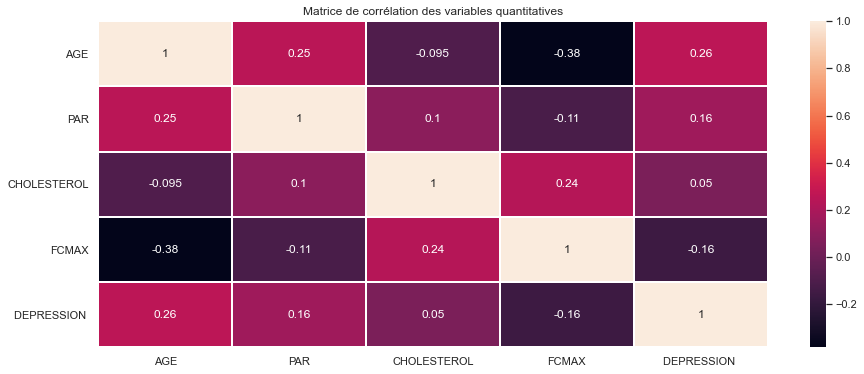

In [128]:
sns.heatmap(df[variable_quanti].corr(), linewidth = 1 , annot = True)
plt.title("Matrice de corrélation des variables quantitatives")
plt.show()

In [22]:
for i in  df.select_dtypes(object):
    for j in df.select_dtypes(object):
        if i != j:
            matrice = pd.crosstab(df[i], df[j])
            khi2, pval , ddl , contingent_theorique = chi2_contingency(matrice)
            print(matrice)
            print("La pval : {} ".format(pval))
            print('*'*50)
            print('*'*50)

TDT     AA  ASY  AT  DNA
SEXE                    
femme   60   70  10   53
homme  113  426  36  150
La pval : 4.880336281360552e-08 
**************************************************
**************************************************
ECG    LVH  Normal   ST
SEXE                   
femme   47     118   28
homme  141     434  150
La pval : 0.08912244139807841 
**************************************************
**************************************************
ANGINE  Non  Oui
SEXE            
femme   150   43
homme   397  328
La pval : 1.2387163558796499e-08 
**************************************************
**************************************************
PENTE  Ascendant  Descendant  Plat
SEXE                              
femme        111           7    75
homme        284          56   385
La pval : 1.83174739624214e-05 
**************************************************
**************************************************
SEXE  femme  homme
TDT               
AA       60    113
A

# Analyse des variables prédictibles en fonction de la variable cible

In [ ]:
#Analyse de la variable Age et Coeur

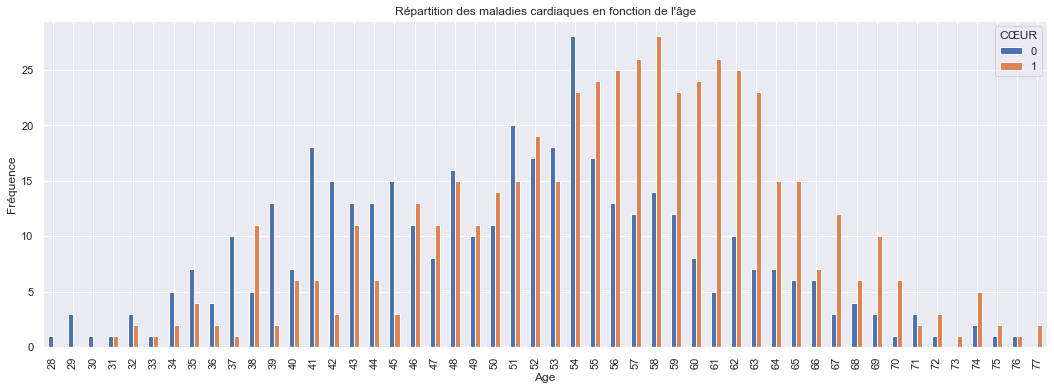

In [35]:
pd.crosstab(df.AGE,df.CŒUR).plot(kind="bar",figsize=(18,6))
plt.title("Répartition des maladies cardiaques en fonction de l'âge")
plt.xlabel('Age')
plt.ylabel('Fréquence')
plt.show()

In [ ]:
#Analyse de la variable SEXE et Coeur

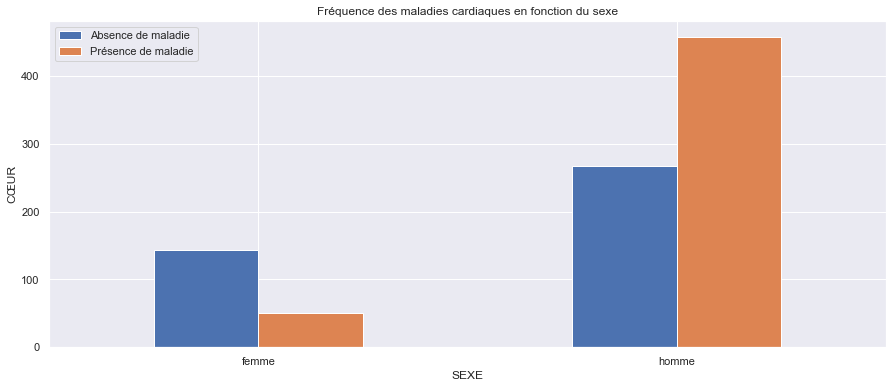

In [144]:
pd.crosstab(df.SEXE,df.CŒUR).plot(kind="bar",figsize=(15,6))
plt.title('Fréquence des maladies cardiaques en fonction du sexe')
plt.xticks(rotation=0)
plt.legend(["Absence de maladie", "Présence de maladie"])
plt.ylabel('CŒUR')
plt.show()

In [ ]:
#Analyse de la variable TDT en fonction de la variable CŒUR

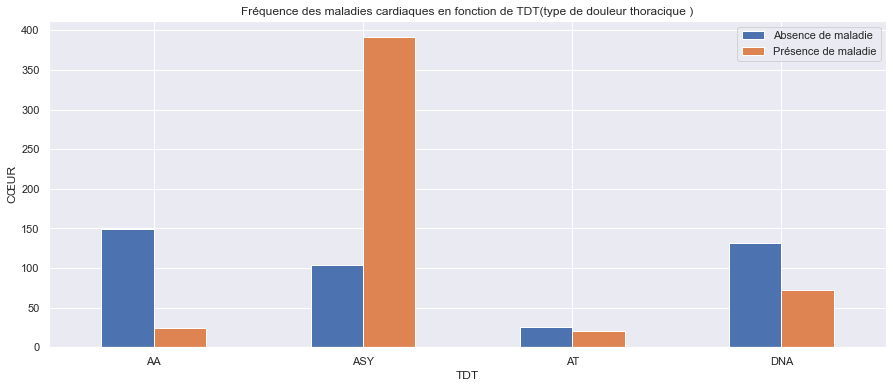

In [145]:
pd.crosstab(df.TDT,df.CŒUR).plot(kind="bar",figsize=(15,6))
plt.title('Fréquence des maladies cardiaques en fonction de TDT(type de douleur thoracique )')
plt.xticks(rotation=0)
plt.legend(["Absence de maladie", "Présence de maladie"])
plt.ylabel('CŒUR')
plt.show()

In [ ]:
#Analyse de la variable PAR en fonction de la variable CŒUR

<AxesSubplot:xlabel='PAR', ylabel='Count'>

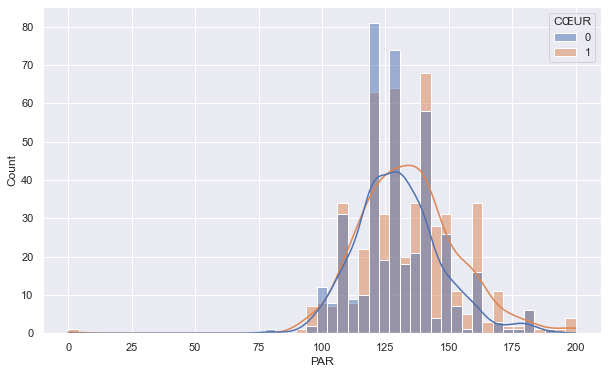

In [115]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x="PAR",kde=True,hue="CŒUR")

In [51]:
#Analyse de la variable CHOLESTEROL en fonction de la variable CŒUR 

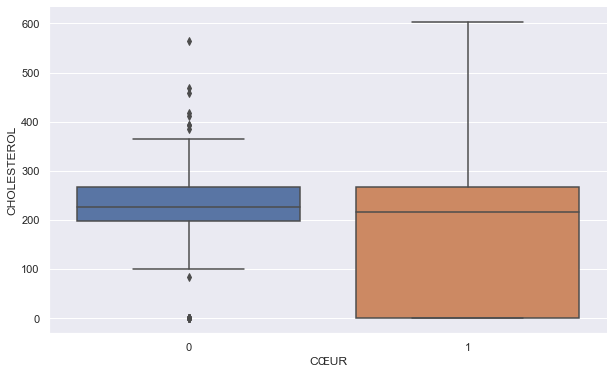

In [147]:
plt.figure(figsize=(10,6))
sns.boxplot(x= "CŒUR" ,y="CHOLESTEROL",data=df)
sns.despine()

In [ ]:
#Analyse de la variable GAJ en fonction de la variable CŒUR 

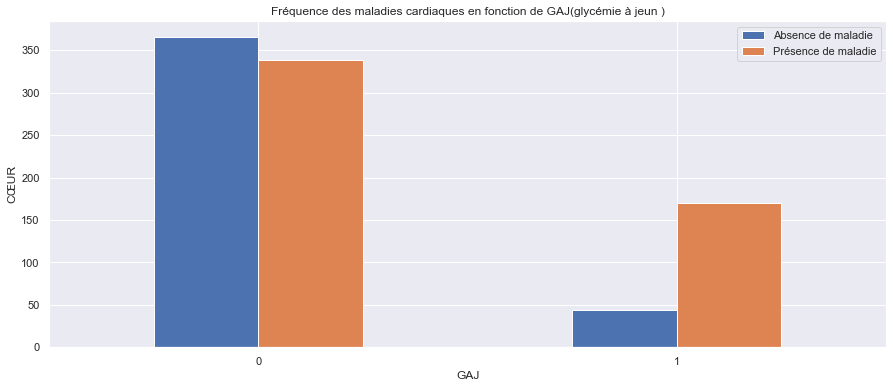

In [92]:
pd.crosstab(df.GAJ,df.CŒUR).plot(kind="bar",figsize=(15,6))
plt.title('Fréquence des maladies cardiaques en fonction de GAJ(glycémie à jeun )')
plt.xticks(rotation=0)
plt.legend(["Absence de maladie", "Présence de maladie"])
plt.ylabel('CŒUR')
plt.show()

In [ ]:
#Analyse de la variable ECG en fonction de la variable CŒUR 

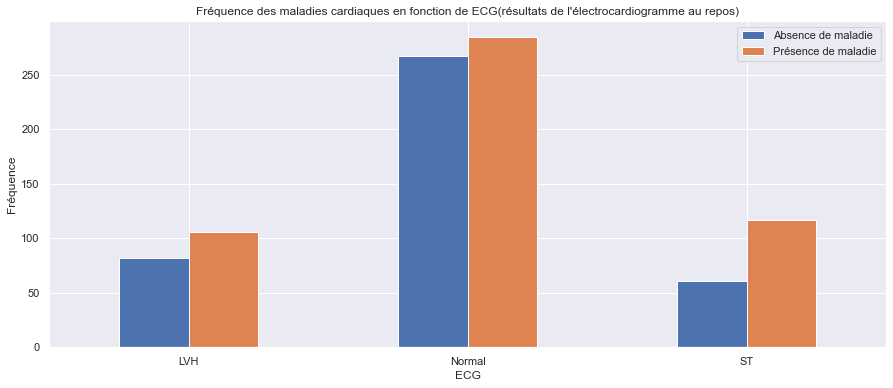

In [68]:
pd.crosstab(df.ECG,df.CŒUR).plot(kind="bar")
plt.title("Fréquence des maladies cardiaques en fonction de ECG(résultats de l'électrocardiogramme au repos)")
plt.xticks(rotation=0)
plt.legend(["Absence de maladie", "Présence de maladie"])
plt.ylabel('Fréquence')
plt.show()

In [ ]:
#Analyse de la variable FCMAX en fonction de la variable CŒUR 

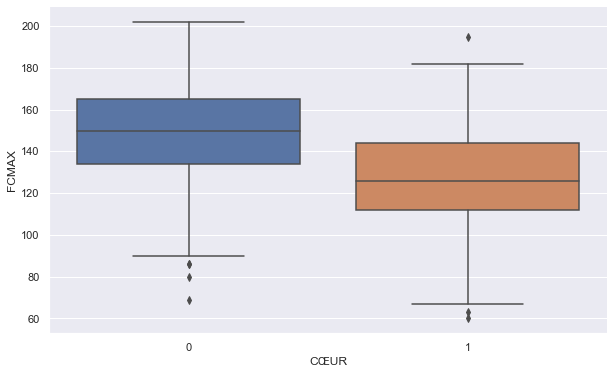

In [86]:
plt.figure(figsize=(10,6))
sns.boxplot(x= "CŒUR" ,y="FCMAX",data=df)
sns.despine()

In [ ]:
#Analyse de la variable ANGINE en fonction de la variable CŒUR 

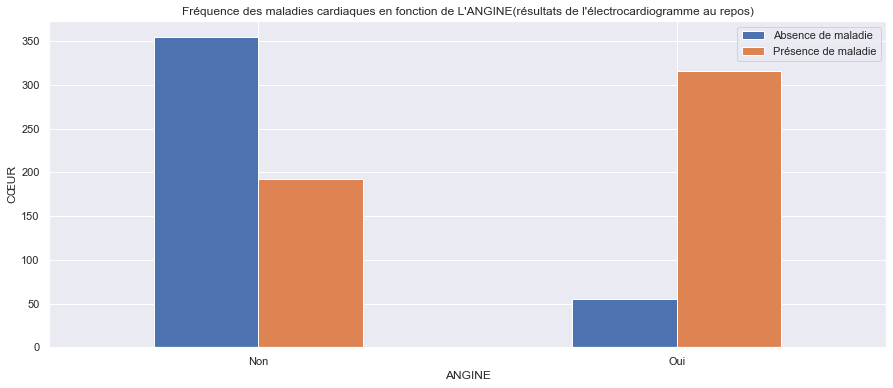

In [91]:
pd.crosstab(df.ANGINE,df.CŒUR).plot(kind="bar")
plt.title("Fréquence des maladies cardiaques en fonction de L'ANGINE(résultats de l'électrocardiogramme au repos)")
plt.xticks(rotation=0)
plt.legend(["Absence de maladie", "Présence de maladie"])
plt.ylabel('CŒUR')
plt.show()

In [ ]:
#Analyse de la variable DEPRESSION en fonction de la variable CŒUR 

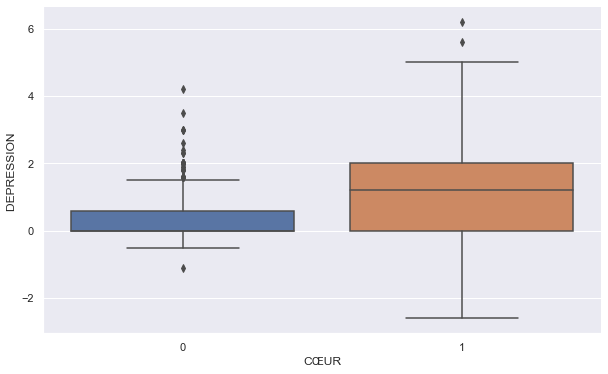

In [94]:
plt.figure(figsize=(10,6))
sns.boxplot(x= "CŒUR" ,y="DEPRESSION ",data=df)
sns.despine()

In [ ]:
#Analyse de la variable PENTE en fonction de la variable CŒUR 

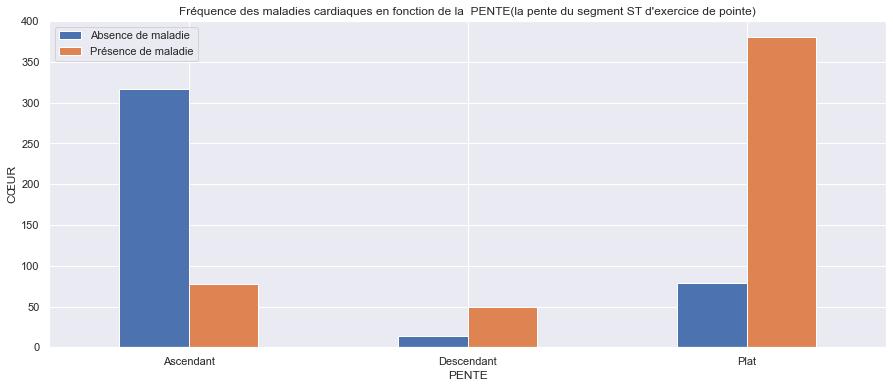

In [98]:
pd.crosstab(df.PENTE,df.CŒUR).plot(kind="bar",figsize=(15,6))
print()
plt.title("Fréquence des maladies cardiaques en fonction de la  PENTE(la pente du segment ST d'exercice de pointe)")
plt.xticks(rotation=0)
plt.legend(["Absence de maladie", "Présence de maladie"])
plt.ylabel('CŒUR')
plt.show()

# Résumé de l'analyse


1- Notre df contient plus d'homme que de femme :79% d'hommes et  21% de femme.

2- Sur 918 individus étudier 504 on une présence de maladie et 410 non présentent une absence de maladie.

3-l'age des individus étudier varie entre 28 et 77 ans.Les personnes ayant un age compris entre 48 et 63 ans sont majoritaires.

4- Sur les individus étudier 18,8% ont une angine atypique,(AA), 22% ont une douleur non angineuse, 54% sont 
asymptomatique(ASY) et 5% ont une angine typique(AT).

5-77% des individus obsersés ont un taux de glycémie à jeun > 120 mg/dl et 23% ont un taux de glycémie à jeun < 120 mg/dl.

6-Sur les individus observés, 60% ont un résultats de l'électrocardiogramme au repos Normal, 19% ont un résultats de l'électrocardiogramme au repos présentant une anomalie de l'onde ST-T et 20% ont un résultats de l'électrocardiogramme
au repos montrant une hypertrophie ventriculaire gauche probable.

7-Sur les individus observés, 60% présentent une absence d'angine induite par l'exercice contre 40% de présence d'angine induite par l'exercice .

8-Sur les individus observés, 43% ont la pente du segment ST d'exercice de pointe, 50% ont la pente du segment ST d'exercice de pointe et 7% la pente du segment ST d'exercice de pointe.

# Correlation entre variables quantitatives

    Faible correlation négative entre l'age et la fréquence cardiaque maximale atteinte.
    Faible correlation positive entre le cholesterol et la fréquence cardiaque maximale
    Faible correlation positive entre age et dépression artérielle au repos(PAR)

# Correlation entre variables qualitatives
    
    -il y a une faible corelationles variables  ECG et SEXE (0.8%)
    -il y a une correlation entre les variables  PENT et ECG (0.1%)
    
    
# Analyse des variables prédictibles en fonction de la variable cible
    
1-les personnes comprise entre 0 et 30 ans n'ont casiment pas de maladie cardiaque.
A partir de 31 ans on un des présence de maladie cardiaque et au fure et a mésure que l'age augment 
la présence de maladie cardiaque est de plus en plus élever par rapport au personne qui ne présente pas de maladie dardiaque.

2- On remarque que la présence de maladie est plus fréquente chez les homme que les femmes.Cela pourait s'expliquer par le taux relativment faible de portion de femme dans le data set.Nous confirmerons ou infirmerons cette hypothèse par des tests statistiques. 
3-On remarque que les individus ayant un type de douleur thoracique ASY (une asymptomatique) ont une  forte présence de maladie cardiaques contrairement aux autres individus ayant un type de douleur thoracique AA,AT et DNA.

4-La plage normale de la pression artérielle veineuse est de 85-130 mmHg. On constate que même si la pression artérielle veineuse se situe dans la plage normale, il existe toujours des présences  de maladie cardiaque.

5-On constate que la médiane des 2 boxplot celle de la présence et celle de l'absence de maladie cardio vasculaire sont pratiquement les même .On peut donc suposser que la présence du CHOLESTEROL n'explique pas la présence ou l'absence de maladie cardio vasculaire.

6-Sur les individus étudier on remarque que les individus dont le taux de glycémie à jeun > 120 mg/dl sont fortement
toucher par une maladie cardiaque contrèrement aux individus dont le taux de glycémie à jeun < 120 mg/dl.

7-On remarque que peut importe le résultat de l'électrocardiogramme au repos qu'il soit :
Normal(normal), ST(présentant une anomalie de l'onde ST-T) ou HVG(montrant une hypertrophie ventriculaire gauche probable)
le risque de présence de maladie cardiaque est élevé.

8-On constate qu'il y a une différence significative entre les FCMAX des personnes présentant une maladie cardio vasculaire et celle n'emprésentant pas .On peut donc suppossé que le FCMAX  explique la présence ou l'absence de maladie cardio vasculaire .

9-On constate que les individus en présence d'angine induite par l'exercice sont fortement affecter poar les maladies cardio vasculaire par rapport aux individs en absence d'angine induite par l'exercice.On peut donc suposé que la présence ou l'absence 
d'ANGINE explique la présence ou l'absence de maladie cardio vasculaire.

10-On constate qu'il y a une différence significative entre les Valeur numérique mesurée en dépression(DEPRESSION) des personnes 
ayant une présence de maladie cardio vasculaire et celle n'ayant pas .On peut donc supposer que le taux de DEPRESSION explique la présence ou l'absence de maladie cardio vassculaire.

11-On constate que les individus ayant une pente du segment "Ascendante" on un faible taux de présence de maladie cardio vasculaire,contrairement aux individus ayant une pente du segment "Descendante" ou "Plat" qui on un taux de présence de maladie cardio vasculaire élevé.
    
 